In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

/Users/williamsanders/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
df = pd.read_csv('house-votes-84.data',header = None )

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [7]:
df.columns = ['class_name', 'handicapped_infants','water_project_cost','adoption_of_budget', 'physician_free_freeze','el_salvador','religious_groups_in_schools','anti_satellite','aid_to_nicaraguan','mx_missile','immigration','synfuels_corp','education_spending','superfund_right_to_sue','crime','duty_free','export_admin']

In [8]:
df.head()

,class_name,handicapped_infants,water_project_cost,adoption_of_budget,physician_free_freeze,el_salvador,religious_groups_in_schools,anti_satellite,aid_to_nicaraguan,mx_missile,immigration,synfuels_corp,education_spending,superfund_right_to_sue,crime,duty_free,export_admin
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [9]:
df.replace('y', 1, inplace = True)
df.replace('n', 0, inplace = True)
df.replace('?', np.nan, inplace=True)
df.fillna(df.mean(),inplace=True)
df.head(5)

,class_name,handicapped_infants,water_project_cost,adoption_of_budget,physician_free_freeze,el_salvador,religious_groups_in_schools,anti_satellite,aid_to_nicaraguan,mx_missile,immigration,synfuels_corp,education_spending,superfund_right_to_sue,crime,duty_free,export_admin
0,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,democrat,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,democrat,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,democrat,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


## Exercise 5.2

In [10]:
# X = df[0]
X = df.iloc[:,1:]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)

In [11]:
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(304, 16)
(304,)
(131, 16)
(131,)


------

## Exercise 5.3 - KNN Algorithm

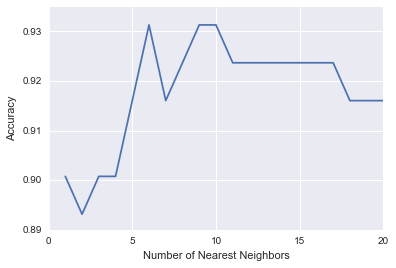

In [12]:
KNeighborsScores = []
a = range(1,21)
for k in xrange(20):
#     print k
    neigh = KNeighborsClassifier(n_neighbors=k+1)
    fit = neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    KNeighborsScores.append(accuracy_score(y_test, y_pred))
plt.plot(a, KNeighborsScores);
plt.ylabel('Accuracy')
plt.xlabel('Number of Nearest Neighbors')

In [13]:
max(KNeighborsScores)

0.93129770992366412

The k value that gives the highest accuracy is around the 9 and 10 Nearest Neighbors point with a score of 0.93129.

-------

## Exercise 5.4 LogisticRegression

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
fit = model.fit(X_train,y_train)
y_pred = fit.predict(X_test)
LogisticRegressionScore = accuracy_score(y_test,y_pred);
LogisticRegressionScore

0.93893129770992367

We get a score of 0.9389 which is a little higher than the 0.93129. 

------

## Exerise 5.5 

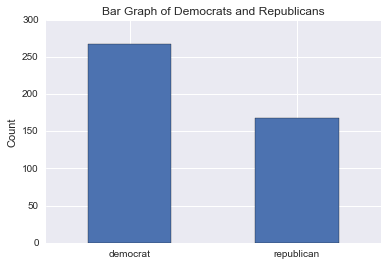

In [15]:
pd.value_counts(y).plot(kind="bar",rot=0)
plt.ylabel('Count')
plt.title('Bar Graph of Democrats and Republicans');

In [16]:
df.class_name.value_counts()

democrat      267
republican    168
Name: class_name, dtype: int64

In [17]:
def predict_democrat(X):
    return ['democrat' for d in range(len(X))]
def predict_republic(X):
    return ['republican' for d in range(len(X))]
y_pred = predict_democrat(X_test)
scoreDemocrat = accuracy_score(y_test,y_pred)
y_pred = predict_republic(X_test)
scoreRepublican = accuracy_score(y_test,y_pred)
print('Guess Democrat Score:',scoreDemocrat,'Guess Republic Score',scoreRepublican)

('Guess Democrat Score:', 0.58778625954198471, 'Guess Republic Score', 0.41221374045801529)


-----

## Exercise 5.6

Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.

In [18]:
KNeighborsScores

[0.9007633587786259,
 0.89312977099236646,
 0.9007633587786259,
 0.9007633587786259,
 0.91603053435114501,
 0.93129770992366412,
 0.91603053435114501,
 0.92366412213740456,
 0.93129770992366412,
 0.93129770992366412,
 0.92366412213740456,
 0.92366412213740456,
 0.92366412213740456,
 0.92366412213740456,
 0.92366412213740456,
 0.92366412213740456,
 0.92366412213740456,
 0.91603053435114501,
 0.91603053435114501,
 0.91603053435114501]

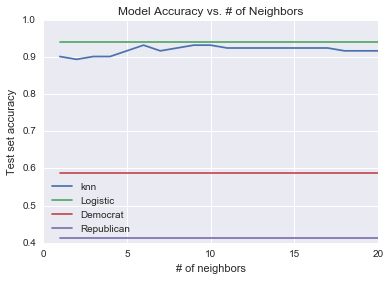

In [19]:
plt.plot(xrange(1,21), KNeighborsScores, label = 'knn')
plt.plot(xrange(1,21), [LogisticRegressionScore]*20, label = 'Logistic')
plt.plot(xrange(1,21), [scoreDemocrat]*20, label = 'Democrat')
plt.plot(xrange(1,21), [scoreRepublican]*20, label = 'Republican')
plt.legend(loc=0)
plt.xlabel('# of neighbors')
plt.ylabel('Test set accuracy')
plt.title('Model Accuracy vs. # of Neighbors');

-----

## Exercise 5.7

Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself, use this function:

from sklearn.learning_curve import learning_curve

This will give you the m, training errors and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do crossvalidation all by itself. Easy, isn't it? : ) Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one for each fold (separate partition) of the cross validation. A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. What I mean is that doing something like:

train_cv_err = np.mean(train_err, axis=1)

test_cv_err = np.mean(ts_err, axis=1)

Before plotting m vs train_cv_err and m vs test_cv_err, where train_err and test_err are the vectors returned by the learning curve function. The np.mean(...., axis=1) means take the mean along axis 1 (axis 1 is the columns axis-- for each row, you have a bunch of columns, each corresponding to a cross validation fold, you are averaging these columns for each row).

Draw the learning curve for KNN with the best k value as well.

In [20]:
from sklearn.learning_curve import learning_curve


/Users/williamsanders/anaconda/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [21]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

knnmodel = KNeighborsClassifier(n_neighbors = 6)
m, trainerror, testerror = learning_curve(knnmodel, X, y, cv = 10)
train_sizes, train_scores, valid_scores = learning_curve(SVC(kernel='linear'), X, y, train_sizes=[50, 80, 110], cv=5)
print train_sizes            
print train_scores           
print valid_scores           
# 

[ 50  80 110]
[[ 0.98        0.98        0.98        0.98        0.98      ]
 [ 0.9875      0.975       0.975       0.975       0.975     ]
 [ 0.99090909  0.99090909  0.98181818  0.98181818  0.98181818]]
[[ 0.95454545  0.88636364  0.94252874  0.94186047  0.86046512]
 [ 0.96590909  0.86363636  0.96551724  0.89534884  0.8255814 ]
 [ 0.95454545  0.97727273  0.95402299  0.93023256  0.86046512]]


Automatically created module for IPython interactive environment


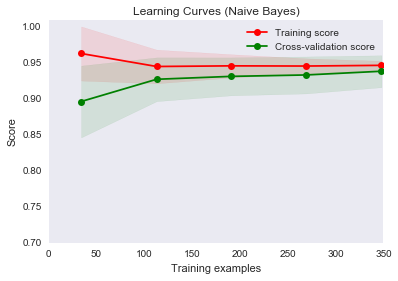

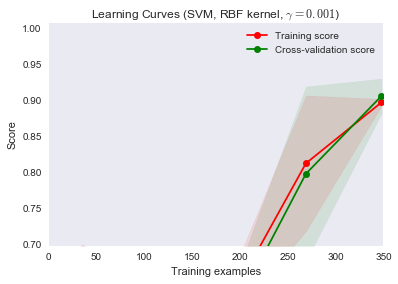

In [22]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


# digits = load_digits()
# X, y = digits.data, digits.target


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

-----

## Exercise 5.8

This is a preview of many other classification algorithms that we will go over. Scikit.learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each:

Gaussian Naive Bayes

* from sklearn.naive_bayes import GaussianNB

SVM (Support Vector Machine) Classifier

* from sklearn.svm import SVC

Decision Tree

* from sklearn.tree import DecisionTreeClassifier

Random Forest

* from sklearn.ensemble import RandomForestClassifier

In [23]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
fit = clf.fit(X_train, y_train)
NBpred = clf.predict(X_test)
NBscore = accuracy_score(y_test, NBpred)
print NBscore


0.93893129771


In [24]:
from sklearn.svm import SVC

clf1 = SVC()
fit1 = clf1.fit(X_train,y_train)
# SVC(priors=None)
SVCpred = fit1.predict(X_test)
SVCscore = accuracy_score(y_test, SVCpred)
SVCscore

0.95419847328244278

In [25]:
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier()
fit2 = clf2.fit(X_train,y_train)
DTCpred = fit2.predict(X_test)
DTCscore = accuracy_score(y_test, DTCpred)
DTCscore

0.95419847328244278

In [26]:
from sklearn.ensemble import RandomForestClassifier
clf3 = RandomForestClassifier()
fit3 = clf3.fit(X_train, y_train)
RFCpred = fit3.predict(X_test)
RFCscore = accuracy_score(y_test, RFCpred)
RFCscore

0.93893129770992367

----

## Exercise 5.9

There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yourself:

from sklearn.cross_validation import cross_val_score

Just like the learning_curve function, this takes a classifier object, X and Y. Returns accuracy (or whatever score you prefer by using the scoring keyword argument). Of course, it will return a score for each cross validation fold, so to get the generalized accuracy, you need to take the mean of what it returns.

Use this function to calculate the cross validation score of each of the classifiers you tried before.

In [27]:
from sklearn.cross_validation import cross_val_score
NB_score_crossval = np.mean(cross_val_score(GaussianNB(),X,y, cv=9))
print "NBScore", NB_score_crossval


NBScore 0.939981666425


In [28]:
from sklearn.cross_validation import cross_val_score
NB_score_crossval = np.mean(cross_val_score(GaussianNB(),X,y, cv=9))
print "NBScore", NB_score_crossval


NBScore 0.939981666425


In [29]:
SVC_score = np.mean(cross_val_score(SVC(), X, y, cv=9))
print "SVC Score:", SVC_score

SVC Score: 0.956047667294


In [30]:
DTC_score = np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=9))
print "DTC Score:" , DTC_score

DTC Score: 0.932889467844


In [31]:
RFC_score = np.mean(cross_val_score(RandomForestClassifier(), X, y, cv=9))
print "RFC Score:" , RFC_score

RFC Score: 0.956144159792


-----

## Exercise 5.10

Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.

In [32]:
df2 = pd.read_csv('house-votes-84.data',header = None )
# df2.columns = ['class_name', 'handicapped_infants','water_project_cost','adoption_of_budget', 'physician_free_freeze','el_salvador','religious_groups_in_schools','anti_satellite','aid_to_nicaraguan','mx_missile','immigration','synfuels_corp','education_spending','superfund_right_to_sue','crime','duty_free','export_admin']

In [33]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [34]:
df2.replace('y', 1.0, inplace = True)
df2.replace('n', 0, inplace = True)
df2.replace('?', np.nan, inplace=True)
df2.fillna(np.round(df2.mean()),inplace=True)
# df2.head(5)
df2.shape

(435, 17)

In [35]:
# df2.apply(lambda x: x.fillna(x.mode()),axis=0)
df2.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
9,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [37]:
X = df2.iloc[:,2:]
y = df2.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)

In [38]:
# from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
fit = model.fit(X_train,y_train)
y_pred = fit.predict(X_test)
LogisticRegressionScore = accuracy_score(y_test,y_pred);
LogisticRegressionScore

0.6717557251908397

In [73]:
crossValLogistic = cross_val_score(LogisticRegression(), X, y, cv=9)
crossValidation = np.mean(crossValLogistic)
crossValidation



0.75490196078431371

----

## Exercise 5.11

In [81]:
moviedf = pd.read_csv('2013_movies.csv')

In [82]:
moviedf.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 0:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 0:00


In [83]:
moviedf["Runtime<=100"] = moviedf['Runtime'] 

In [84]:
# moviedf["Runtime<=100"] = moviedf.map( lambda x: 0 if x <= 100 else 1)
moviedf["Runtime<=100"] = np.where(moviedf['Runtime']<= 100, 1, 0)

In [85]:
moviedf.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Runtime<=100
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00,0
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 0:00,0
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00,0
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00,1
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 0:00,0


In [86]:
moviedf["Runtime>100"] = np.where(moviedf['Runtime']> 100, 1, 0)

In [87]:
moviedf = moviedf.dropna()

In [88]:

y = moviedf['Runtime<=100']
X = moviedf.drop(['Runtime<=100', 'Title','Runtime>100', 'ReleaseDate', 'Director','Runtime'], axis=1)
X = pd.get_dummies(X)
X.head()

,Budget,DomesticTotalGross,Rating_PG,Rating_PG-13,Rating_R
0,130000000.0,424668047,0.0,1.0,0.0
1,200000000.0,409013994,0.0,1.0,0.0
2,150000000.0,400738009,1.0,0.0,0.0
3,76000000.0,368061265,1.0,0.0,0.0
4,225000000.0,291045518,0.0,1.0,0.0


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)

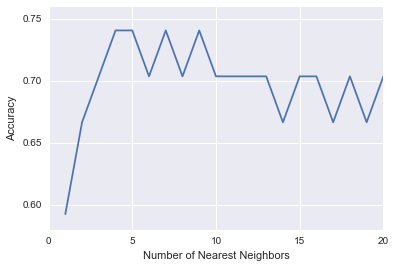

In [90]:
KNeighborsScores = []
a = range(1,21)
for k in xrange(20):
#     print k
    neigh = KNeighborsClassifier(n_neighbors=k+1)
    fit = neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    KNeighborsScores.append(accuracy_score(y_test, y_pred))
plt.plot(a, KNeighborsScores);
plt.ylabel('Accuracy')
plt.xlabel('Number of Nearest Neighbors')

In [91]:
model = LogisticRegression()
fit = model.fit(X_train,y_train)
y_pred = fit.predict(X_test)
LogisticRegressionScore = accuracy_score(y_test,y_pred);
LogisticRegressionScore

0.66666666666666663

In [92]:
KNeighborsScores

[0.59259259259259256,
 0.66666666666666663,
 0.70370370370370372,
 0.7407407407407407,
 0.7407407407407407,
 0.70370370370370372,
 0.7407407407407407,
 0.70370370370370372,
 0.7407407407407407,
 0.70370370370370372,
 0.70370370370370372,
 0.70370370370370372,
 0.70370370370370372,
 0.66666666666666663,
 0.70370370370370372,
 0.70370370370370372,
 0.66666666666666663,
 0.70370370370370372,
 0.66666666666666663,
 0.70370370370370372]

In [93]:
baseline = y.mode().iloc[0]
y_baseline = [baseline]*len(y_pred)

In [94]:
# y_baseline

In [95]:
accuracyscore = accuracy_score(y_test,y_baseline);
accuracyscore

0.66666666666666663

In [113]:
model = LogisticRegression()
fit = model.fit(X,y)
for i  in fit.coef_:
    for j in i:
        print (j)
# X.columns

-8.53654186463e-09
-1.88932726722e-09
4.19050803505e-16
-2.48750412238e-16
-2.79826450533e-16


----

## Exercise 5.12

In [56]:
survivaldf = pd.read_csv('haberman.data', header = None)

In [57]:
survivaldf.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [58]:

survivaldf.columns = ['Age','YearOfOperation','Nodes','Survival']

In [59]:
survivaldf.head()

,Age,YearOfOperation,Nodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [60]:
survivaldf.describe()

,Age,YearOfOperation,Nodes,Survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000



Average Age: 52 with a standard deviation of 10.8 years. 

#### What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?

In [61]:
# survivaldf.groupby(['Age', 'Survival']).mean()

In [62]:
survivaldf[survivaldf['Survival'] == 1]['Age'].describe()

count    225.000000
mean      52.017778
std       11.012154
min       30.000000
25%       43.000000
50%       52.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

In [63]:
survivaldf[survivaldf['Survival'] == 2]['Age'].describe()

count    81.000000
mean     53.679012
std      10.167137
min      34.000000
25%      46.000000
50%      53.000000
75%      61.000000
max      83.000000
Name: Age, dtype: float64

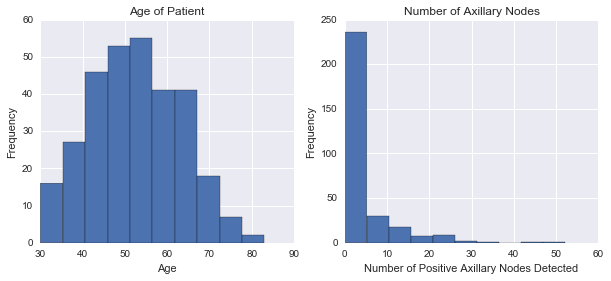

In [64]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(survivaldf['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age of Patient')

plt.subplot(1, 2, 2)
plt.hist(survivaldf['Nodes'])
plt.xlabel('Number of Positive Axillary Nodes Detected')
plt.ylabel('Frequency')
plt.title('Number of Axillary Nodes');

In [65]:
survivaldf.YearOfOperation.min()

58

Earlier year is 1958. 

In [66]:
X = survivaldf.iloc[:,:3]
y = survivaldf.iloc[:,3]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
LogisticRegressionSurv = LogisticRegression().fit(X_train, y_train)
y_pred_survival = LogisticRegressionSurv.predict(X_test)
print(accuracy_score(y_test, y_pred_survival))

0.739130434783


In [67]:
LogisticRegressionSurv.coef_

array([[ 0.02092939, -0.03263333,  0.0586169 ]])

Automatically created module for IPython interactive environment


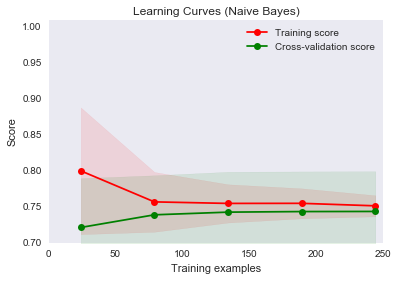

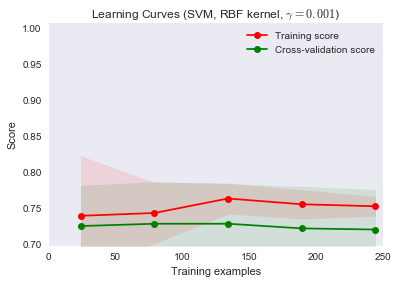

In [68]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


# digits = load_digits()
# X, y = digits.data, digits.target


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

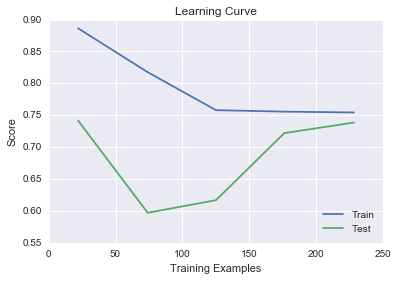

In [69]:
m, train_accuracy, test_accuracy = learning_curve(LogisticRegression(), X, y, cv=4)
trainAccuracy = np.mean(train_accuracy, axis=1)
testAccuracy = np.mean(test_accuracy, axis=1)

plt.plot(m, trainAccuracy)
plt.plot(m, testAccuracy)
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(['Train', 'Test'], loc = 'lower right');